# ABEL optimization example

By Carl A. Lindstrøm (University of Oslo), 28 May 2024

### Import ABEL framework

In [1]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

### Define the experiment and beam

In [2]:
# define beam
source = SourceBasic()
source.charge = -100e-12 # [pC]
source.energy = 5e6 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 400e-6 # [m]
source.emit_nx, source.emit_ny = 5e-6, 5e-6 # [m rad]
source.beta_x = 10
source.beta_y = source.beta_x
source.num_particles = 10000
source.length = 3 # [m]
source.jitter.x = 100e-6
source.jitter.y = 100e-6
source.jitter.xp = 0.01e-3
source.jitter.yp = 0.01e-3

# define the RF accelerator
rf_accelerator = RFAcceleratorBasic()
rf_accelerator.nom_energy_gain = 200e6 # [eV]
rf_accelerator.length = 20 # [m]

# define the BDS
bds = BeamDeliverySystemBasic()
bds.beta_x = 0.2 # [m]
bds.beta_y = 0.2 # [m]
bds.length = 5 # [m]

# define linac
linac = ConventionalLinac()
linac.source = source
linac.rf_accelerator = rf_accelerator
linac.bds = bds

# define the plasma lens
plasma_lens = PlasmaLensNonlinearThin()
plasma_lens.length = 0.02 # [m]
plasma_lens.current = -1000 # [A]
plasma_lens.radius = 500e-6 # [m]
plasma_lens.rel_nonlinearity = -0.1

# define the spectrometer
spectrometer = SpectrometerBasicCLEAR()
spectrometer.use_otr_screen = True

# assemble 
experiment = ExperimentAPL()
experiment.linac = linac
experiment.plasma_lens = plasma_lens
experiment.spectrometer = spectrometer

In [3]:
experiment.optimize('plasmalens_opti_example', 
                    parameters=[{'name': 'plasma_lens.offset_x', 'type': 'range', 'bounds': [-400e-6, 400e-6]}, 
                                {'name': 'plasma_lens.offset_y', 'type': 'range', 'bounds': [-400e-6, 400e-6]}], 
                    merit_fcn=lambda obj: Beam.x_offset(obj.final_beam)**2 + Beam.y_offset(obj.final_beam)**2,
                    label='offsets', 
                    num_shots_per_step=5,
                    num_steps=10, parallel=True, overwrite=True)

[INFO 05-29 15:08:54] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='plasma_lens.offset_x', parameter_type=FLOAT, range=[-0.0004, 0.0004]), RangeParameter(name='plasma_lens.offset_y', parameter_type=FLOAT, range=[-0.0004, 0.0004])], parameter_constraints=[]).
[INFO 05-29 15:08:54] ax.modelbridge.dispatch_utils: Using Models.BOTORCH_MODULAR since there are more ordered parameters than there are categories for the unordered categorical parameters.
[INFO 05-29 15:08:54] ax.modelbridge.dispatch_utils: Calculating the number of remaining initialization trials based on num_initialization_trials=None max_initialization_trials=None num_tunable_parameters=2 num_trials=None use_batch_trials=False
[INFO 05-29 15:08:54] ax.modelbridge.dispatch_utils: calculated num_initialization_trials=5
[INFO 05-29 15:08:54] ax.modelbridge.dispatch_utils: num_completed_initialization_trials=0 num_remaining_initialization_trials=5
[INFO 05-29 15:08:54] ax.modelb

Output()

[INFO 05-29 15:09:00] ax.service.managed_loop: Running optimization trial 2...


Output()

[INFO 05-29 15:09:01] ax.service.managed_loop: Running optimization trial 3...


Output()

[INFO 05-29 15:09:01] ax.service.managed_loop: Running optimization trial 4...


Output()

[INFO 05-29 15:09:01] ax.service.managed_loop: Running optimization trial 5...


Output()

[INFO 05-29 15:09:02] ax.service.managed_loop: Running optimization trial 6...


Output()

[INFO 05-29 15:09:05] ax.service.managed_loop: Running optimization trial 7...


Output()

[INFO 05-29 15:09:07] ax.service.managed_loop: Running optimization trial 8...


Output()

[INFO 05-29 15:09:09] ax.service.managed_loop: Running optimization trial 9...


Output()

[INFO 05-29 15:09:10] ax.service.managed_loop: Running optimization trial 10...


Output()

({'plasma_lens.offset_x': 5.978080243916942e-06,
  'plasma_lens.offset_y': 4.353590938644986e-06},
 ({'objective': 5.671564976208839e-09},
  {'objective': {'objective': 1.289998673338691e-15}}))

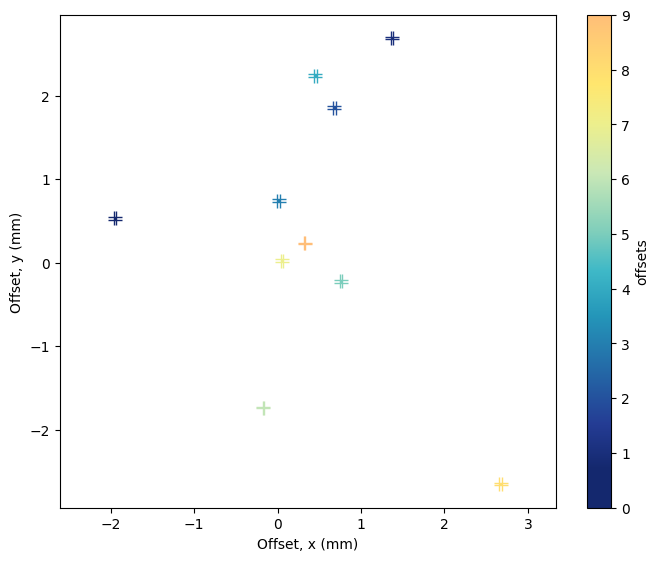

In [4]:
experiment.plot_correlation_offsets()